In [1324]:
#from google.colab import drive
#drive.mount('/content/drive')

In [1325]:
pip install Imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/wifiphisher-1.4-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


Note: you may need to restart the kernel to use updated packages.


In [1326]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import power_transform
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.feature_selection import SelectFromModel

#aea_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Inteligencia Artificial/WA_Fn-UseC_-HR-Employee-Attrition.csv')
aea_df = pd.read_csv('./WA_Fn-UseC_-HR-Employee-Attrition.csv')
aea_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [1327]:
aea_df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [1328]:
aea_df['OverTime']

0       Yes
1        No
2       Yes
3       Yes
4        No
       ... 
1465     No
1466     No
1467    Yes
1468     No
1469     No
Name: OverTime, Length: 1470, dtype: object

Carga la base de datos y realiza los análisis necesarios para responder a las siguientes
preguntas:
* a) ¿Cuántas y cuáles de las variables son numéricas?
  1. i. ¿Cuántas y cuáles de estas variables numéricas son de valor entero?
  #### 26
  2. ii. ¿Cuántas y cuáles de estas variables numéricas son de valor real (flotante)?
  #### 0
  3. iii. De existir el caso, ¿cuántas y cuáles de estas variables numéricas se pueden
  anular del problema? Justifica tu respuesta.
  ####  Employee count: Todos los valores en la tabla son iguales no tiene valor en el analisis.
####  StandardHours: Es un valor unico no tiene relevancia en el analisis.
####  Employee Number: Es un identificador unico por empleado no tiene relevancia en el analisis.

* b) ¿Cuántas y cuáles de las variables son categóricas?

  ### 9

  1. i. ¿Cuántas y cuáles de estas variables son binarias?



      *   Attrition
      *   Gender
      *   Over18
      *   OverTime
      *   Department
      *   BusinessTravel

  2. ii. ¿Cuántas y cuáles de estas variables son nominales? Indica el total de
  niveles que tiene cada una de estas variables.
      
      *   EducationField
      *   MaritalStatus


  3. iii. ¿Cuántas y cuáles de estas variables son ordinales? Indica el total de niveles

      *   PerformanceRating
      *   Education
      *   EnvironmentSatisfaction
      *   JobInvolvement
      *   JobSatisfaction
      *   RelationshipSatisfaction
      *   WorkLifeBalance

que tiene cada una de estas variables.
iv. De existir el caso, ¿cuántas y cuáles de estas variables categóricas se pueden
anular del problema? Justifica tu respuesta.

Over18 -> todos los valores son iguales

* c) En esta base de datos y con base a la información dada, ¿existe alguna o algunas
variables cuya clasificación en algún tipo de dato dependa del analista? ¿Cuáles y
por qué?

In [1329]:
aea_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [1330]:
aea_df.dtypes.value_counts()

int64     26
object     9
dtype: int64

In [1331]:
aea_df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [1332]:
aea_df.drop(columns=["Over18", "EmployeeCount", "EmployeeNumber", "StandardHours"], inplace=True)

In [1333]:
Xtrain, XTestTemp, ytrain, ytestTemp = train_test_split(aea_df, aea_df['Attrition'], test_size=0.30, random_state=1, stratify=aea_df['Attrition'])
Xtest, Xval, ytest, yval = train_test_split(XTestTemp, ytestTemp, test_size=0.5, random_state=1)

In [1334]:
Xtrain.shape

(1029, 31)

In [1335]:
Xtest.shape

(220, 31)

In [1336]:
Xval.shape

(221, 31)

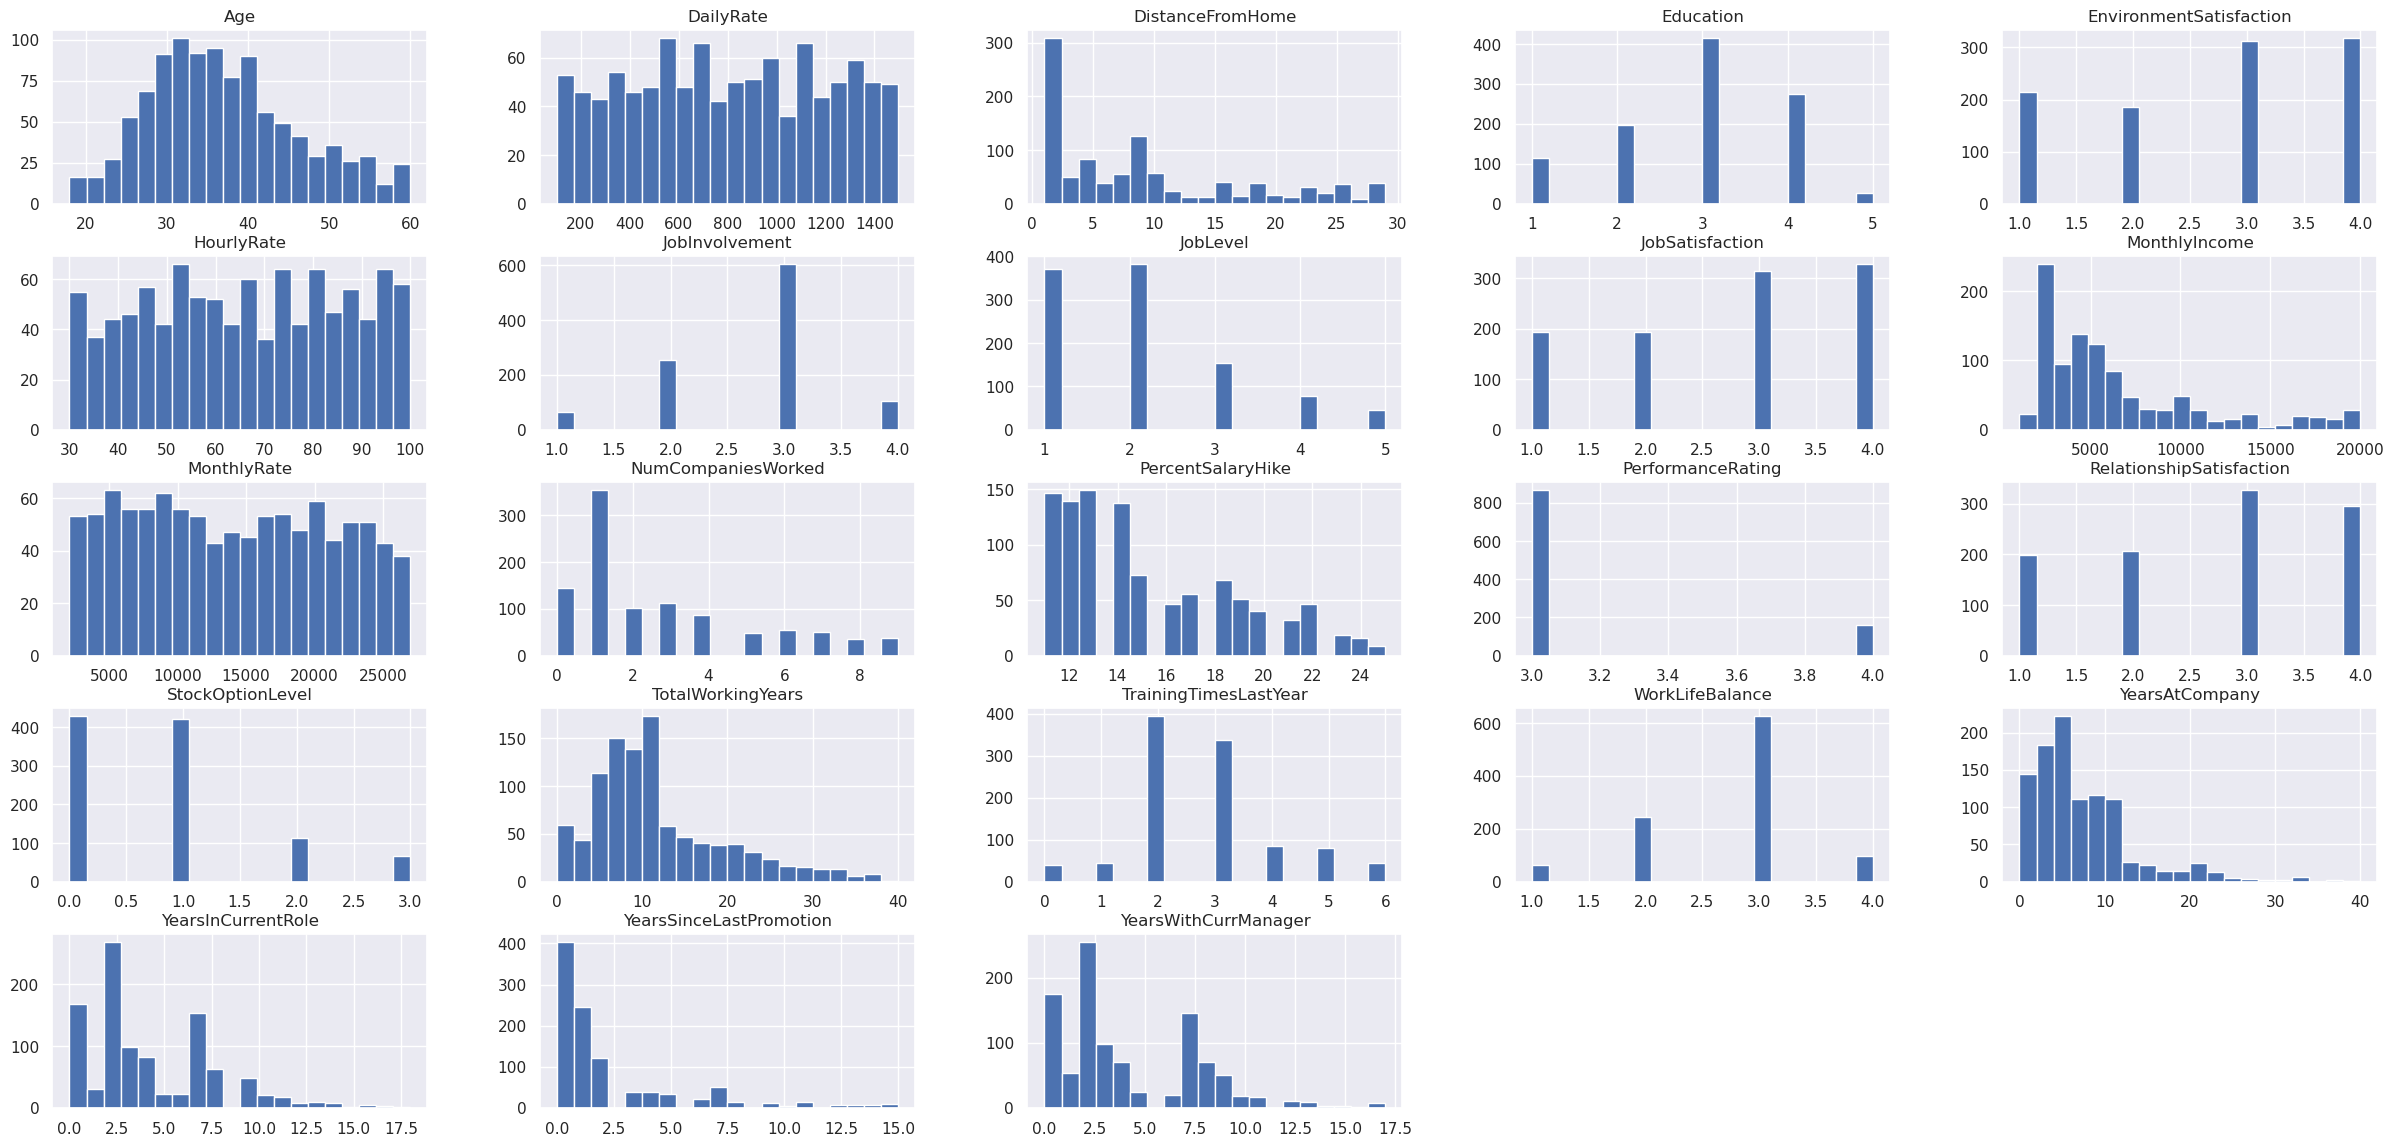

In [1337]:
Xtrain.select_dtypes(include=['number']).hist(figsize=(30,14), bins=20)
plt.show()

Yo sugiero transformar con MinMaxScaler() todas las columnas para que estén a la misma escala.  

In [1338]:
# Lista de los nombres de las 7 variables que trabajaremos en este ejercicio.
misdatos = Xtrain.select_dtypes(include=['number'])
variables_a_transformar = misdatos
variables_a_transformar

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1073,28,1083,29,1,3,96,1,2,2,6549,...,3,2,2,8,2,2,8,6,1,7
1105,33,1242,8,4,1,46,3,2,1,6392,...,3,4,1,8,6,1,2,2,2,2
538,41,314,1,3,4,59,2,5,3,19189,...,3,2,1,22,3,3,22,7,2,10
1300,34,810,8,2,2,92,4,2,3,6799,...,4,3,2,10,5,3,10,8,4,8
1382,31,976,3,2,3,48,3,1,1,3065,...,3,4,1,4,3,4,4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,37,1372,1,3,4,42,3,1,4,2115,...,3,2,0,17,3,3,17,12,5,7
125,26,841,6,3,3,46,2,1,2,2368,...,3,3,0,5,3,2,5,4,4,3
160,22,1256,19,1,3,80,3,1,4,2323,...,4,1,2,2,6,3,2,2,2,2
691,40,1469,9,4,4,35,3,1,2,3617,...,3,4,1,3,2,3,1,1,0,0


In [1339]:
variables_a_transformar = ['DailyRate', 'DistanceFromHome',
       'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [1340]:
len(variables_a_transformar)

13

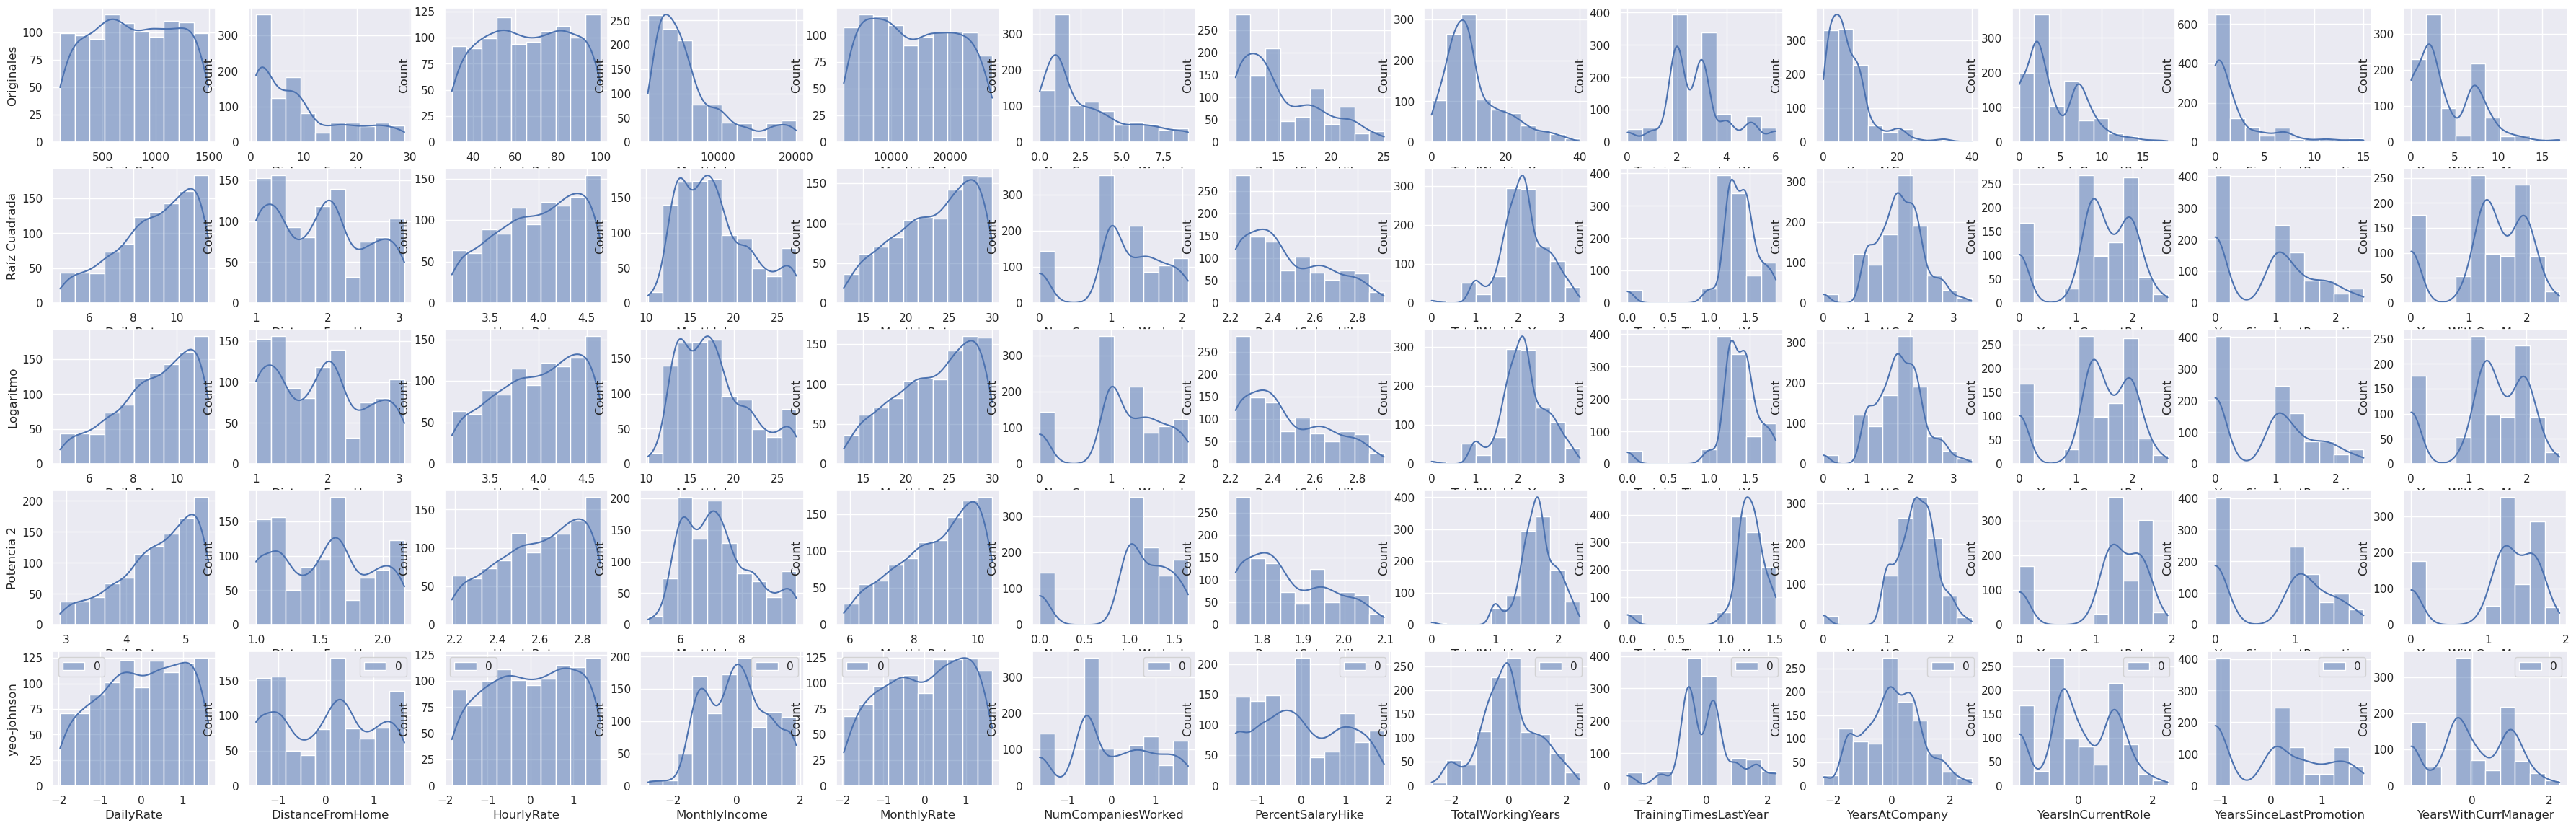

In [1341]:
sns.set(rc={'figure.figsize':(45,14)})


columns = len(variables_a_transformar)
fig, axes = plt.subplots(5, columns)

for k in range(0,columns):

    # Datos originales ---------------------------------------------------------
    plt.subplot(5,columns,k+1)

    Transf0 = misdatos[variables_a_transformar[k]]         #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
    sns.histplot(Transf0, bins=10, kde=True)                             #  En este línea agrega el comando para obtener el histograma de Transf0 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Originales')



    # Datos transformados con raíz cuadrada ------------------------------------
    plt.subplot(5,columns,k+14)

    Transf1 = np.cbrt(misdatos[variables_a_transformar[k]])   #  En esta línea se debe aplicar la raíz cuadrada a los valores de cada variable "k" sin transformar.
    sns.histplot(Transf1, bins=10, kde=True)                                #  En este línea agrega el comando para obtener el histograma de Transf1 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Raíz Cuadrada')



    # Datos transformados con logaritmo natural --------------------------------
    plt.subplot(5,columns,k+27)

    Transf2 = np.log(misdatos[variables_a_transformar[k]]+1)  #  En esta línea se debe aplicar el logaritmo natural a los valores de cada variable "k" sin transformar.
    sns.histplot(Transf1, bins=10, kde=True)                              #  En este línea agrega el comando para obtener el histograma de Transf2 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Logaritmo')



    # Datos transformados con la potencia de 2 ---------------------------------
    plt.subplot(5,columns,k+40)

    Transf3 = np.power(misdatos[variables_a_transformar[k]], .23)  #  En esta línea debes elevar al cuadrado los valores de cada variable "k" sin transformar.
    sns.histplot(Transf3, bins=10, kde=True)                               #  En este línea agrega el comando para obtener el histograma de Transf3 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Potencia 2')


    # Datos transformados con Box-Cox ------------------------------------------
    plt.subplot(5,columns,k+53)

    Transf4 = power_transform(misdatos[variables_a_transformar[k]].values.reshape(-1,1), method='yeo-johnson') #  En esta línea se debe aplicar la transformación Box-Cox a los valores de cada variable "k" sin transformar.
    sns.histplot(Transf4, bins=10, kde=True)                    #  En este línea agrega el comando para obtener el histograma de Transf4 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('yeo-johnson')

    # TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
    ################################################################################################################



plt.show()

* DistanceFromHome            = True -> YeoJohnson
* percentSalaryHike           = True -> YeoJohnson
* MonthlyIncome               = True -> CBRT
* YearsAtCompany              = True -> CBRT
* YearsSinceLastPromotion     = True -> CBRT
* YearsWithCurrManager        = True -> SQRT
* YearsInCurrentRole          = True -> SQRT
* TotalWorkingYars            = True -> SQRT
* NumCompaniesWorked          = True -> SQRT
* DayliRate                   = False
* HourlyRate                  = False
* MonthlyRate                 = False
* TrainningTimesLastYear      = False

In [1342]:
#XtrainT, XvalT y XtestT.
XtrainT = Xtrain.copy()
XvalT = Xval.copy()
XtestT = Xtest.copy()

XtrainT

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1073,28,No,Travel_Rarely,1083,Research & Development,29,1,Life Sciences,3,Male,...,3,2,2,8,2,2,8,6,1,7
1105,33,No,Travel_Rarely,1242,Sales,8,4,Life Sciences,1,Male,...,3,4,1,8,6,1,2,2,2,2
538,41,No,Travel_Rarely,314,Human Resources,1,3,Human Resources,4,Male,...,3,2,1,22,3,3,22,7,2,10
1300,34,No,Travel_Rarely,810,Sales,8,2,Technical Degree,2,Male,...,4,3,2,10,5,3,10,8,4,8
1382,31,No,Non-Travel,976,Research & Development,3,2,Medical,3,Male,...,3,4,1,4,3,4,4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,37,No,Travel_Rarely,1372,Research & Development,1,3,Life Sciences,4,Female,...,3,2,0,17,3,3,17,12,5,7
125,26,No,Travel_Rarely,841,Research & Development,6,3,Other,3,Female,...,3,3,0,5,3,2,5,4,4,3
160,22,No,Travel_Rarely,1256,Research & Development,19,1,Medical,3,Male,...,4,1,2,2,6,3,2,2,2,2
691,40,No,Travel_Frequently,1469,Research & Development,9,4,Medical,4,Male,...,3,4,1,3,2,3,1,1,0,0


In [1343]:

YeoJohnson = ['DistanceFromHome', 'PercentSalaryHike']
CBRTt = ['MonthlyIncome', 'YearsAtCompany', 'YearsSinceLastPromotion']
SQRTt = ['NumCompaniesWorked', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager']

# TRANS RAIZ CUADRADA
XtrainT[SQRTt] = np.sqrt(XtrainT[SQRTt])
XvalT[SQRTt] = np.sqrt(XvalT[SQRTt])
XtestT[SQRTt] = np.sqrt(XtestT[SQRTt])

# Transformación Raiz cubica
XtrainT[CBRTt] = np.sqrt(XtrainT[CBRTt])
XvalT[CBRTt] = np.sqrt(XvalT[CBRTt])
XtestT[CBRTt] = np.sqrt(XtestT[CBRTt])


# Transformación Yeo-Johnson
XtrainT[YeoJohnson] = power_transform(XtrainT[YeoJohnson], method='yeo-johnson')
XvalT[YeoJohnson] = power_transform(XvalT[YeoJohnson], method='yeo-johnson')
XtestT[YeoJohnson] = power_transform(XtestT[YeoJohnson], method='yeo-johnson')


#HAGO MIS VARIABLES 
ytrainT = ytrain.copy()
yvalT = yval.copy()
ytestT = ytest.copy()

      *   Attrition
      *   Gender
      *   Over18
      *   OverTime

In [1344]:
binaryColumns = ["Gender", "OverTime", "Attrition","BusinessTravel","Department"]
le = LabelEncoder()
# Transformación de las variables binarias con LabelEncoder 
for i in binaryColumns:
    XtrainT[i]
    le.fit(XtrainT[i])
    XtrainT[i] = le.transform(XtrainT[i])
    XvalT[i] = le.transform(XvalT[i])
    XtestT[i] = le.transform(XtestT[i])
XtestT

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
819,28,0,2,1451,1,-1.026743,1,Life Sciences,1,1,...,3,1,0,2.449490,2,1,2.236068,1.732051,0.000000,2.000000
871,24,1,2,984,1,1.119474,2,Life Sciences,4,0,...,3,1,1,1.000000,3,1,1.000000,0.000000,0.000000,0.000000
1213,23,1,2,427,2,0.149442,3,Life Sciences,3,1,...,4,2,1,1.732051,2,3,1.732051,1.414214,0.000000,1.414214
119,43,0,1,394,2,1.603673,2,Life Sciences,3,1,...,3,4,2,5.000000,3,4,5.000000,3.464102,2.000000,3.464102
544,47,0,1,217,2,-0.681431,3,Medical,4,0,...,3,4,2,5.291503,2,2,4.690416,1.414214,3.316625,3.605551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,35,0,1,664,1,-1.513902,3,Medical,2,1,...,3,4,1,2.236068,2,2,1.732051,1.414214,1.000000,1.414214
383,22,0,2,253,1,0.634731,3,Medical,1,0,...,3,4,1,1.414214,1,3,1.414214,1.000000,1.000000,1.414214
361,40,0,2,1171,1,0.530635,4,Life Sciences,4,0,...,3,3,1,3.162278,3,3,2.645751,2.645751,1.000000,2.645751
526,39,0,2,408,1,-1.026743,4,Technical Degree,4,0,...,3,1,0,4.472136,4,3,4.472136,2.645751,3.316625,3.162278


In [1345]:
XtrainT[binaryColumns]

,Gender,OverTime,Attrition,BusinessTravel,Department
1073,1,0,0,2,1
1105,1,0,0,2,2
538,1,0,0,2,0
1300,1,0,0,2,2
1382,1,1,0,0,1
...,...,...,...,...,...
285,0,0,0,2,1
125,0,0,0,2,1
160,1,0,0,2,1
691,1,1,0,1,1


In [1346]:
XvalT[binaryColumns]

,Gender,OverTime,Attrition,BusinessTravel,Department
656,1,1,1,2,1
330,0,0,0,1,1
133,1,1,0,2,2
281,1,0,0,2,2
1048,1,0,0,2,2
...,...,...,...,...,...
1232,1,0,0,2,1
881,0,1,0,1,1
1371,0,0,0,2,2
964,0,0,0,2,2


In [1347]:
XtestT[binaryColumns]

,Gender,OverTime,Attrition,BusinessTravel,Department
819,1,0,0,2,1
871,0,0,1,2,1
1213,1,1,1,2,2
119,1,1,0,1,2
544,0,1,0,1,2
...,...,...,...,...,...
68,1,0,0,1,1
383,0,0,0,2,1
361,0,1,0,2,1
526,0,0,0,2,1


In [1348]:
le.fit(ytrainT)
ytrainT=le.transform(ytrainT)
yvalT=le.transform(yvalT)
ytestT=le.transform(ytestT)
ytestT

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [1349]:
variables_a_transformar_ordinales=['PerformanceRating',
'EnvironmentSatisfaction',
'JobInvolvement',
'JobSatisfaction',
'RelationshipSatisfaction',
'WorkLifeBalance',
'Education']

In [1350]:
XtrainT[variables_a_transformar_ordinales].nunique()

PerformanceRating           2
EnvironmentSatisfaction     4
JobInvolvement              4
JobSatisfaction             4
RelationshipSatisfaction    4
WorkLifeBalance             4
Education                   5
dtype: int64

Los valores de estas variables ordinales ya están en valores enteros. Por lo que no se necesita hacerle ninguna transformación.

Por ejemplo:

Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'
Si los valores subieran en String sí se debería de transformar. Overtime estaba con valores ['Yes', 'No'] que se transformaron a ['1','0']

In [1351]:
XtrainT.shape

(1029, 31)

In [1352]:
XtrainT

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1073,28,0,2,1083,1,1.648245,1,Life Sciences,3,1,...,3,2,2,2.828427,2,2,2.828427,2.449490,1.000000,2.645751
1105,33,0,2,1242,2,0.247712,4,Life Sciences,1,1,...,3,4,1,2.828427,6,1,1.414214,1.414214,1.414214,1.414214
538,41,0,2,314,0,-1.468777,3,Human Resources,4,1,...,3,2,1,4.690416,3,3,4.690416,2.645751,1.414214,3.162278
1300,34,0,2,810,2,0.247712,2,Technical Degree,2,1,...,4,3,2,3.162278,5,3,3.162278,2.828427,2.000000,2.828427
1382,31,0,0,976,1,-0.682272,2,Medical,3,1,...,3,4,1,2.000000,3,4,2.000000,1.414214,1.414214,1.732051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,37,0,2,1372,1,-1.468777,3,Life Sciences,4,0,...,3,2,0,4.123106,3,3,4.123106,3.464102,2.236068,2.645751
125,26,0,2,841,1,-0.041639,3,Other,3,0,...,3,3,0,2.236068,3,2,2.236068,2.000000,2.000000,1.732051
160,22,0,2,1256,1,1.173920,1,Medical,3,1,...,4,1,2,1.414214,6,3,1.414214,1.414214,1.414214,1.414214
691,40,0,1,1469,1,0.369324,4,Medical,4,1,...,3,4,1,1.732051,2,3,1.000000,1.000000,0.000000,0.000000


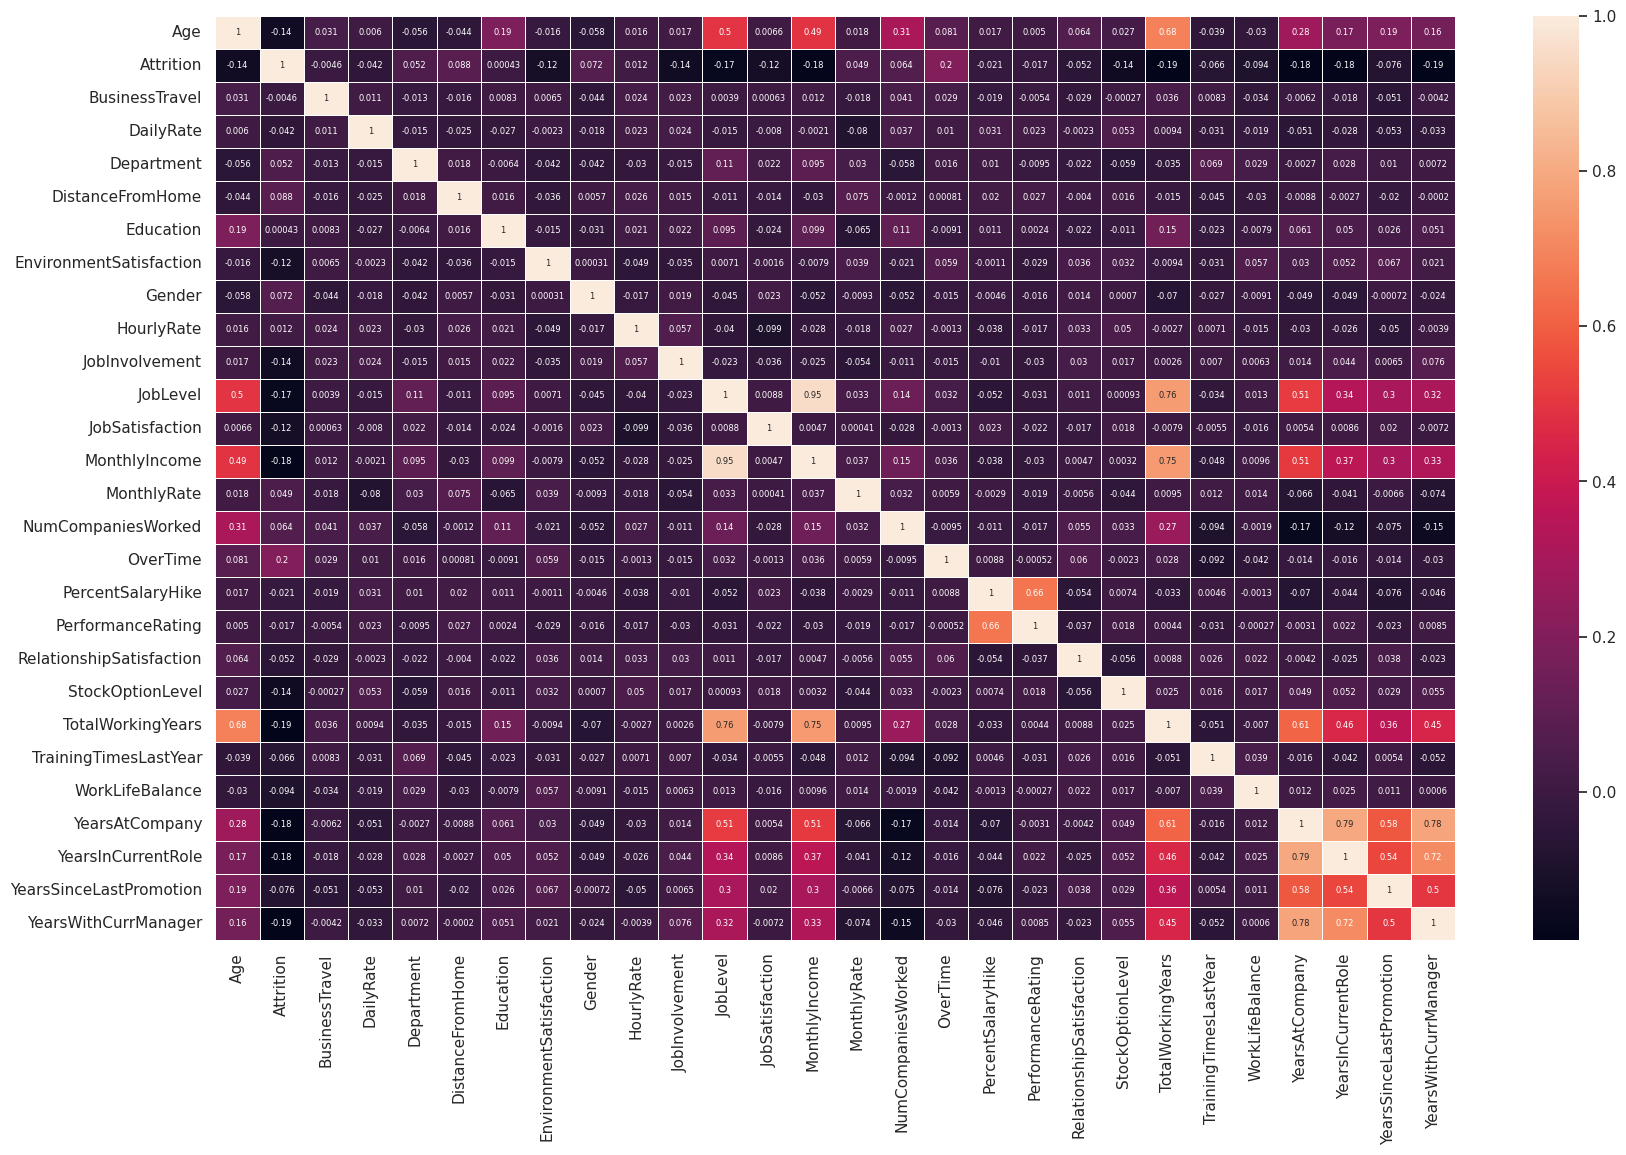

In [1353]:
sns.set(rc={'figure.figsize':(20,12)})
merge = XtrainT
#merge.insert(1, "Attrition", ytrainT, True)
Tcorrelation = merge.corr(method='pearson', numeric_only=True)
sns.heatmap(Tcorrelation,xticklabels=Tcorrelation.columns,
            yticklabels=Tcorrelation.columns, annot=True, annot_kws={"size": 6}, linewidth=.5, vmax=1.0)

plt.show()

* Indica las correlaciones positivas “fuertes” entre pares de factores que encuentres
dentro de la matriz.
    * Age<->TotalWorkingYears : .68
    * Job Level<->TotalWorkingYears : .76
    * MonthlyIncome<->TotalWorkingYears : .75
    * MonthlyIncome<->JobLevel=.95
    * PerformanceRating<->PercentSalaryHike : .66
    * TotalWorkingyears<->YearsAtCompany : .61
    * YearsAtCompany<->YearswithCurrManager : .78
    * YearsAtCompany<->YearsSinceLastPromotion : .58
    * YearsAtCompany<->YearsInCurrentRole : .79
    * YearsInCurrentRole<->YearswithCurrManager : .72

*Indica las correlaciones negativas “fuertes” entre pares de factores que encuentres
dentro de la matriz.

* No hay relaciones negativas fuertes. La unica mas fuerte es la de -0.059
* Deparment <-> StockOptpionLevel
 
    


In [1354]:
Tcorrelation

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.135584,0.030711,0.006049,-0.056479,-0.044181,0.190412,-0.016183,-0.057865,0.015638,...,0.005033,0.064320,0.026593,0.684850,-0.039082,-0.029665,0.281272,0.173404,0.186441,0.161754
Attrition,-0.135584,1.000000,-0.004645,-0.041631,0.052446,0.087944,0.000433,-0.119676,0.071762,0.012173,...,-0.016610,-0.051615,-0.141914,-0.187865,-0.066462,-0.094178,-0.181831,-0.183419,-0.075664,-0.190458
BusinessTravel,0.030711,-0.004645,1.000000,0.010878,-0.013013,-0.015951,0.008279,0.006542,-0.044200,0.023543,...,-0.005430,-0.028757,-0.000272,0.035684,0.008296,-0.033561,-0.006236,-0.018026,-0.051017,-0.004189
DailyRate,0.006049,-0.041631,0.010878,1.000000,-0.015046,-0.024814,-0.026664,-0.002267,-0.018314,0.022851,...,0.022595,-0.002256,0.053051,0.009450,-0.030678,-0.019113,-0.051030,-0.028022,-0.053338,-0.033010
Department,-0.056479,0.052446,-0.013013,-0.015046,1.000000,0.017618,-0.006370,-0.041811,-0.041556,-0.029539,...,-0.009513,-0.021501,-0.058582,-0.034902,0.068528,0.028689,-0.002714,0.027779,0.010200,0.007233
DistanceFromHome,-0.044181,0.087944,-0.015951,-0.024814,0.017618,1.000000,0.015948,-0.036033,0.005711,0.026200,...,0.027394,-0.003956,0.015615,-0.015173,-0.044668,-0.030062,-0.008787,-0.002730,-0.020328,-0.000200
Education,0.190412,0.000433,0.008279,-0.026664,-0.006370,0.015948,1.000000,-0.014783,-0.030809,0.020546,...,0.002367,-0.021721,-0.010761,0.152016,-0.022788,-0.007878,0.061018,0.049919,0.026434,0.050947
EnvironmentSatisfaction,-0.016183,-0.119676,0.006542,-0.002267,-0.041811,-0.036033,-0.014783,1.000000,0.000307,-0.049050,...,-0.029346,0.035822,0.032004,-0.009363,-0.031481,0.057015,0.029715,0.051897,0.067278,0.020931
Gender,-0.057865,0.071762,-0.044200,-0.018314,-0.041556,0.005711,-0.030809,0.000307,1.000000,-0.016879,...,-0.015733,0.013892,0.000700,-0.070149,-0.026650,-0.009070,-0.048910,-0.049232,-0.000718,-0.024304
HourlyRate,0.015638,0.012173,0.023543,0.022851,-0.029539,0.026200,0.020546,-0.049050,-0.016879,1.000000,...,-0.016621,0.032586,0.049840,-0.002688,0.007092,-0.015051,-0.030089,-0.025623,-0.049841,-0.003889


In [1355]:
nominal_values = ['BusinessTravel','Department', 'MaritalStatus', 'JobRole', 'EducationField']
XtrainT = pd.get_dummies(XtrainT, columns=nominal_values, drop_first=True)
XtestT = pd.get_dummies(XtestT, columns=nominal_values, drop_first=True)
XvalT = pd.get_dummies(XvalT, columns=nominal_values, drop_first=True)

XtestT['Attrition'].value_counts()

0    181
1     39
Name: Attrition, dtype: int64

In [1356]:
XtrainT.head().T

,1073,1105,538,1300,1382
Age,28.000000,33.000000,41.000000,34.000000,31.000000
Attrition,0.000000,0.000000,0.000000,0.000000,0.000000
DailyRate,1083.000000,1242.000000,314.000000,810.000000,976.000000
DistanceFromHome,1.648245,0.247712,-1.468777,0.247712,-0.682272
Education,1.000000,4.000000,3.000000,2.000000,2.000000
EnvironmentSatisfaction,3.000000,1.000000,4.000000,2.000000,3.000000
Gender,1.000000,1.000000,1.000000,1.000000,1.000000
HourlyRate,96.000000,46.000000,59.000000,92.000000,48.000000
JobInvolvement,1.000000,3.000000,2.000000,4.000000,3.000000
JobLevel,2.000000,2.000000,5.000000,2.000000,1.000000


In [1357]:
XtrainT.shape

(1029, 45)

In [1358]:
XtestT.shape

(220, 45)

In [1359]:
XvalT.shape

(221, 45)

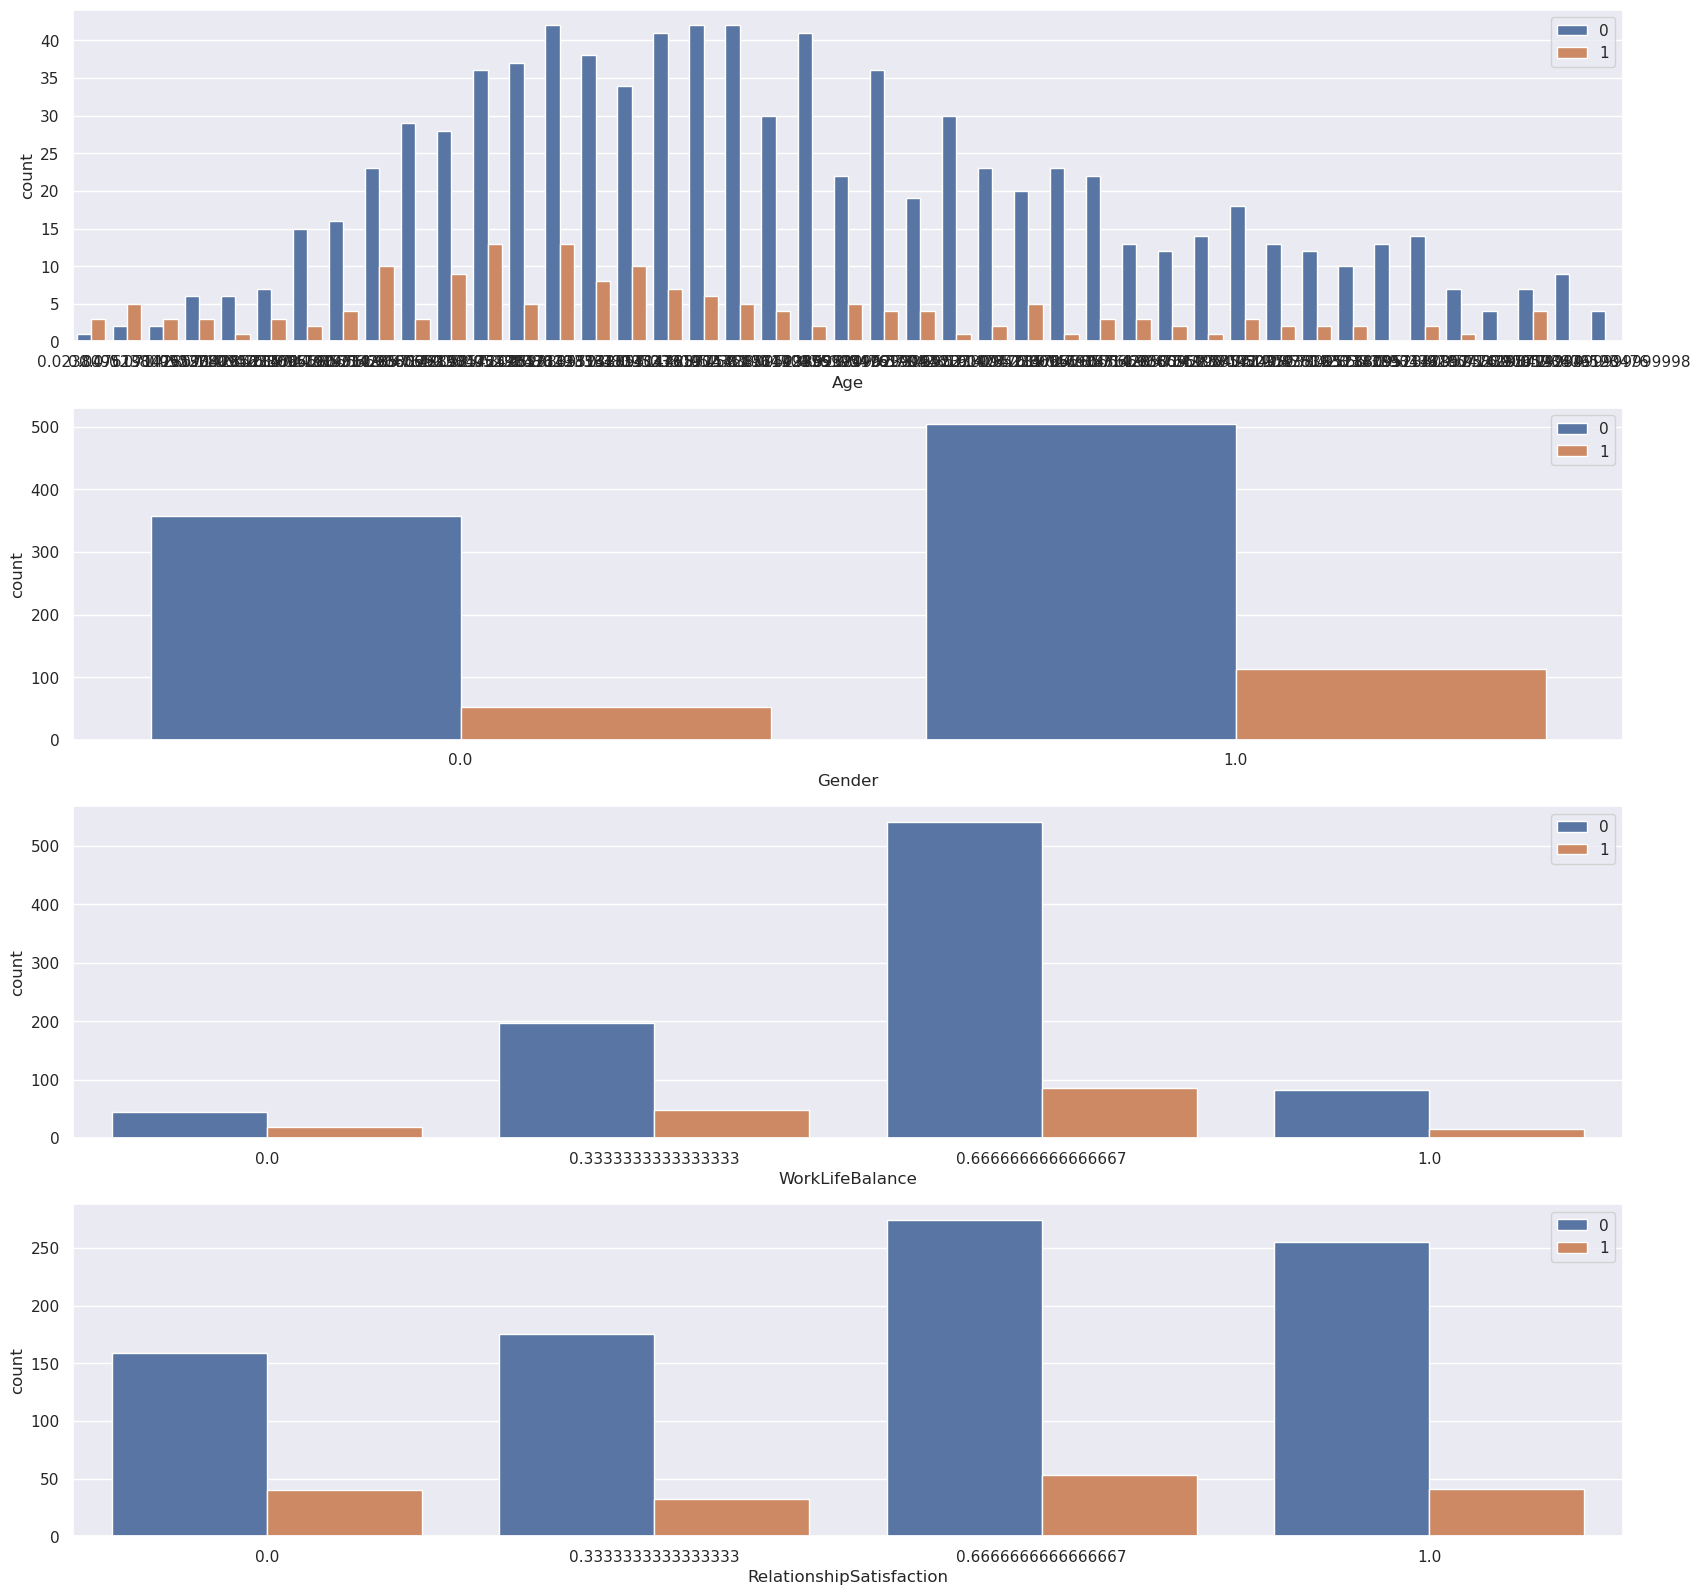

In [1449]:
plt.figure(figsize=(20, 25))
variables = XtrainT[['Age','Gender','WorkLifeBalance','RelationshipSatisfaction']]
for i, col in enumerate(variables):
    plt.subplot(5,1, i+1)
    sns.countplot(XtrainT, x=XtrainT[col], hue=ytrainT)
plt.show()

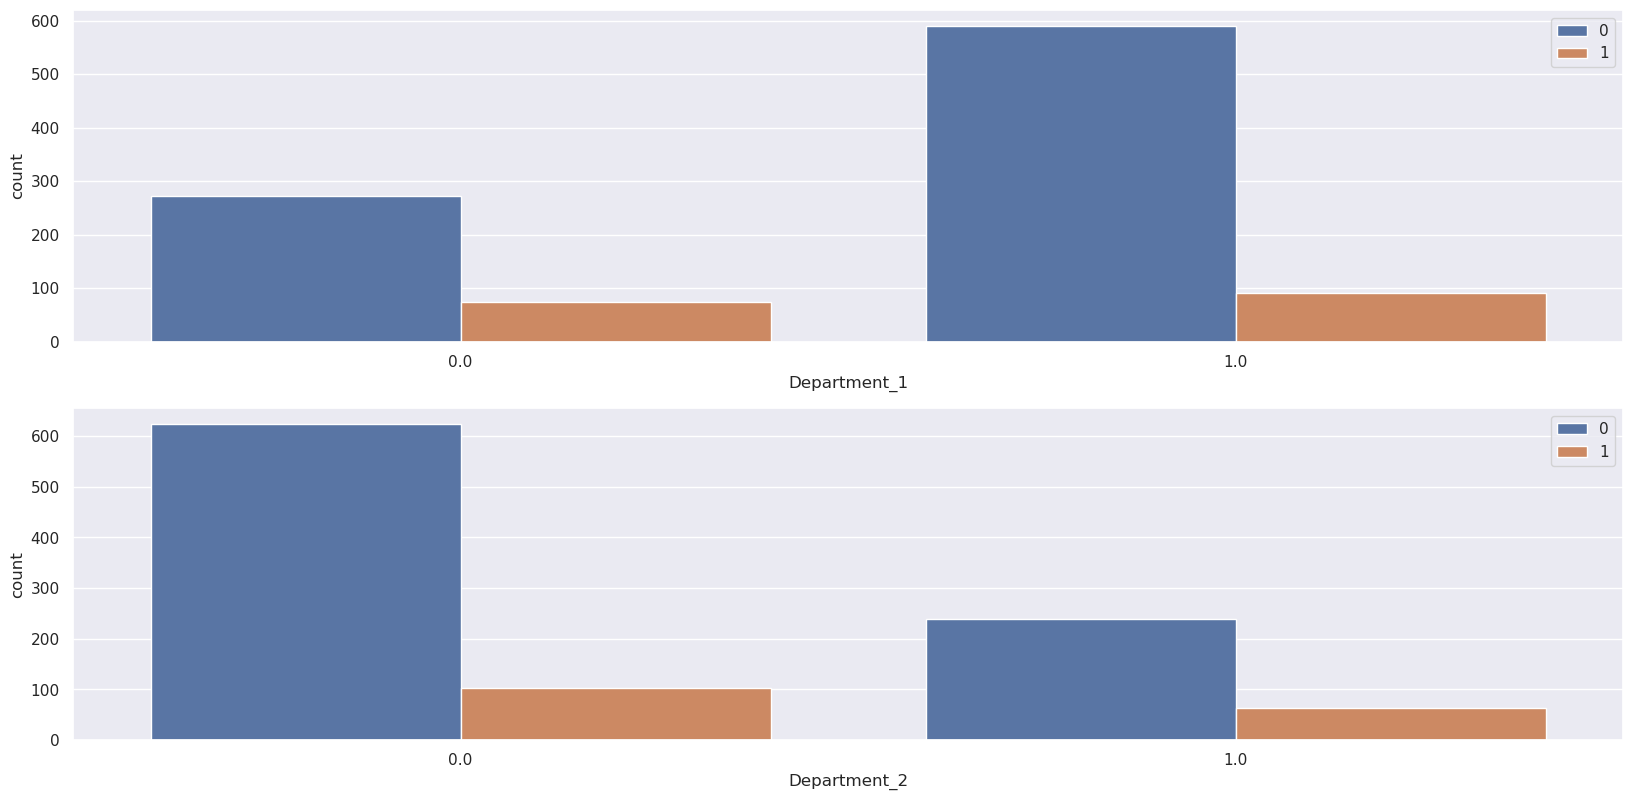

In [1456]:
plt.figure(figsize=(20, 25))
variables = XtrainT.filter(regex='Department')
for i, col in enumerate(variables):
    plt.subplot(5,1, i+1)
    sns.countplot(XtrainT, x=XtrainT[col], hue=ytrainT)
plt.show()

* A las edades 28, 29 y 33, se da más el Attrition.
* El género con más Attrition es el Hombre(Male).
* Los empleados que no están en el departamento de ventas tienen más Attrition.
* WorkLifeBalance 3 'Better' tiene más Attrition.
  ** El balance entre la vida personal y la laboral debe ser óptima(4) para no sufrir de Attrition.
* RelationshipSatisfaction 3 'High' y 4 'Very High' Tienen más Attrition.

In [1361]:
scalar = MinMaxScaler()
x = XtrainT.select_dtypes(include=['number'])
x_scaled = scalar.fit_transform(x)
XtrainT = pd.DataFrame(x_scaled, columns=scalar.get_feature_names_out())


scalar = MinMaxScaler()
xtext = XtestT.select_dtypes(include=['number'])
xtest_scaled = scalar.fit_transform(xtext)
XtestT = pd.DataFrame(xtest_scaled, columns=scalar.get_feature_names_out())

scalar = MinMaxScaler()
xval = XvalT.select_dtypes(include=['number'])
xval_scaled = scalar.fit_transform(xval)
XvalT = pd.DataFrame(xval_scaled, columns=scalar.get_feature_names_out())

XtrainT.drop(columns=["Attrition"], inplace=True)
XtestT.drop(columns=["Attrition"], inplace=True)
XvalT.drop(columns=["Attrition"], inplace=True)

In [1362]:
XtrainT

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,0.238095,0.703730,1.000000,0.00,0.666667,1.0,0.942857,0.000000,0.25,0.333333,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.357143,0.817791,0.550682,0.75,0.000000,1.0,0.228571,0.666667,0.25,0.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.547619,0.152080,0.000000,0.50,1.000000,1.0,0.414286,0.333333,1.00,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.380952,0.507891,0.550682,0.25,0.333333,1.0,0.885714,1.000000,0.25,0.666667,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.309524,0.626973,0.252326,0.25,0.666667,1.0,0.257143,0.666667,0.00,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,0.452381,0.911047,0.000000,0.50,1.000000,0.0,0.171429,0.666667,0.00,1.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1025,0.190476,0.530129,0.457853,0.50,0.666667,0.0,0.228571,0.333333,0.00,0.333333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1026,0.095238,0.827834,0.847828,0.00,0.666667,1.0,0.714286,0.666667,0.00,1.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1027,0.523810,0.980631,0.589698,0.75,1.000000,1.0,0.071429,0.666667,0.00,0.333333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [1363]:
XtestT

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,0.263158,0.966308,0.150204,0.00,0.000000,1.0,0.528571,0.333333,0.00,0.333333,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.157895,0.631541,0.811942,0.25,1.000000,0.0,0.957143,0.666667,0.00,0.333333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.131579,0.232258,0.512854,0.50,0.666667,1.0,0.985714,0.666667,0.00,1.000000,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.657895,0.208602,0.961234,0.25,0.666667,1.0,0.885714,0.666667,0.75,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.763158,0.081720,0.256674,0.50,1.000000,0.0,0.271429,0.666667,0.75,0.666667,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,0.447368,0.402151,0.000000,0.50,0.333333,1.0,0.700000,0.666667,0.00,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
216,0.105263,0.107527,0.662482,0.50,0.000000,0.0,0.185714,0.666667,0.00,0.333333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
217,0.578947,0.765591,0.630387,0.75,1.000000,0.0,0.228571,1.000000,0.00,0.666667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
218,0.552632,0.218638,0.150204,0.75,1.000000,0.0,0.714286,0.333333,0.25,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [1364]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(XtrainT, ytrainT)


LogisticRegression()

Score con XtrainT

In [1365]:
predictionsXtrainT = logisticRegr.predict(XtrainT)
predictionsXtrainT

array([0, 0, 0, ..., 0, 0, 0])

In [1366]:
score = accuracy_score(ytrainT, predictionsXtrainT)
score

0.891156462585034

In [1367]:
recall_score(ytrainT, predictionsXtrainT, average='macro')

0.6991407111644725

Score con XvalT - yvalT

In [1368]:
predictionsXvalT = logisticRegr.predict(XvalT)
predictionsXvalT

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [1369]:
score = accuracy_score(yvalT, predictionsXvalT)
score

0.9049773755656109

In [1370]:
recall_score(yvalT, predictionsXvalT, average='macro')

0.7367724867724867

Matrix de Confusion.

              precision    recall  f1-score   support

 class 0, NO       0.92      0.97      0.95       189
class 1, YES       0.76      0.50      0.60        32

    accuracy                           0.90       221
   macro avg       0.84      0.74      0.77       221
weighted avg       0.90      0.90      0.90       221

              precision    recall  f1-score   support

 class 0, NO       0.90      0.98      0.94       863
class 1, YES       0.82      0.42      0.55       166

    accuracy                           0.89      1029
   macro avg       0.86      0.70      0.75      1029
weighted avg       0.89      0.89      0.88      1029



<function matplotlib.pyplot.show(close=None, block=None)>

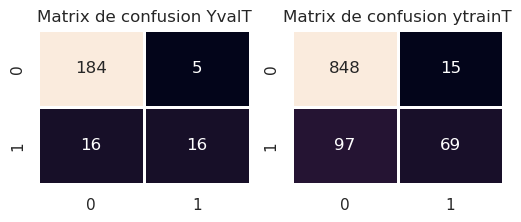

In [1371]:
cf_matrix_vyalT = confusion_matrix(yvalT, predictionsXvalT)
cf_matrix_ytrainT = confusion_matrix(ytrainT, predictionsXtrainT)
plt.figure(figsize=(6, 2))
plt.subplot(1,2,1)
plt.subplot(1,2,1)
plt.title('Matrix de confusion YvalT')
target_names = ['class 0, NO', 'class 1, YES']
print(classification_report(yvalT, predictionsXvalT, target_names=target_names))
sns.heatmap(cf_matrix_vyalT, linewidths=1, annot=True, fmt='g', cbar=False,)
plt.subplot(1,2,2)
plt.title('Matrix de confusion ytrainT')
target_names = ['class 0, NO', 'class 1, YES']
print(classification_report(ytrainT, predictionsXtrainT, target_names=target_names))
sns.heatmap(cf_matrix_ytrainT, linewidths=1, annot=True, fmt='g', cbar=False,)

plt.show

11)

* C) Considero que el modelo está sobre entrenado y sesgado hacia la clase negativa. El puntaje de Precisión hacia 0 en attrition es de 90%, por lo que podemos decir que el modelo se está aprendiendo las posiciones de los datos. 
* D) Considero que sí está desbalanceado, ya que las muestras tienden hacia Attrition = 0. Por lo que el entrenamiento tiene más datos para pronosticar los verdaderos negativos. Considerando el conjunto inicial de datos, tenemos que attrition.
    * No     1233
    * Yes     237

* E) Tiene poca precisión en el momento de pronosticar las clases positivas VP & FP, por el poco muestreo de positivos. 

* F) Tiene poca precisión al detectar la clase positiva. Se le escapan muchos verdaderos positivos. 
* G) Considero que debemos de mejorar el recall, ya que necesitamos entender mejor cuando el attrition es YES(1). No queremos saber por qué no hay NO Attririon(0). Queremos aumentar el recall y disminuir la precisión; es más relevante en este contexto encontrar los verdaderos positivos.

#### 12)

In [1372]:
for k in range(1, 16):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(XtrainT, ytrainT)

    trs = neigh.score(XtrainT, ytrainT)
    tes = neigh.score(XvalT, yvalT)

    print('k=%d\tTrain: %.4f\test: %.4f' % (k, trs, tes))

k=1	Train: 1.0000	est: 0.8100
k=2	Train: 0.8795	est: 0.8597
k=3	Train: 0.8902	est: 0.8416
k=4	Train: 0.8669	est: 0.8597


k=5	Train: 0.8717	est: 0.8507
k=6	Train: 0.8610	est: 0.8643
k=7	Train: 0.8746	est: 0.8643
k=8	Train: 0.8581	est: 0.8643
k=9	Train: 0.8630	est: 0.8778
k=10	Train: 0.8503	est: 0.8688
k=11	Train: 0.8533	est: 0.8643
k=12	Train: 0.8484	est: 0.8597
k=13	Train: 0.8523	est: 0.8643
k=14	Train: 0.8465	est: 0.8643
k=15	Train: 0.8494	est: 0.8597


In [1373]:
dicc_grid = {'n_neighbors': [1,2,5,7,9,11],
             'weights':['uniform', 'distance'],
             'metric':['euclidean', 'manhattan']}

kNN = KNeighborsClassifier()
# RandomSearchCV
modelo_kNN = GridSearchCV(kNN, param_grid=dicc_grid, cv=3)

modelo_kNN.fit(XtrainT, ytrainT)

print("Los mehores parametros son %s con un score de %0.2f" 
      % (modelo_kNN.best_params_, modelo_kNN.best_score_))

Los mehores parametros son {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'} con un score de 0.85


In [1374]:
kNN2 = KNeighborsClassifier(n_neighbors=7, metric='euclidean', weights='uniform', algorithm='brute')

kNN2.fit(XtrainT, ytrainT)

trs = kNN2.score(XtrainT, ytrainT)
tes = kNN2.score(XvalT, yvalT)

print('k=%d\tTrain: %.4f\test: %.4f' % (k, trs, tes))

k=15	Train: 0.8746	est: 0.8643


In [1375]:
predict = kNN2.predict(XtrainT)
predict1 = kNN2.predict(XvalT)

In [1376]:
score = kNN2.score(XtrainT, ytrainT)
score

0.8746355685131195

In [1377]:
recall_score(ytrainT, predict, average='macro')

0.6211764788004859

In [1378]:
score = kNN2.score(XvalT, yvalT)
score

0.8642533936651584

In [1379]:
recall_score(yvalT, predict1, average='macro')

0.5831679894179894

              precision    recall  f1-score   support

 class 0, NO       0.88      0.98      0.92       189
class 1, YES       0.60      0.19      0.29        32

    accuracy                           0.86       221
   macro avg       0.74      0.58      0.61       221
weighted avg       0.84      0.86      0.83       221

              precision    recall  f1-score   support

 class 0, NO       0.87      1.00      0.93       863
class 1, YES       0.91      0.25      0.39       166

    accuracy                           0.87      1029
   macro avg       0.89      0.62      0.66      1029
weighted avg       0.88      0.87      0.84      1029



<function matplotlib.pyplot.show(close=None, block=None)>

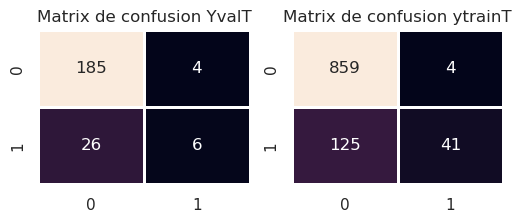

In [1380]:
cf_matrix_vyalT = confusion_matrix(yvalT, predict1)
cf_matrix_ytrainT = confusion_matrix(ytrainT, predict)
plt.figure(figsize=(6, 2))
plt.subplot(1,2,1)
plt.subplot(1,2,1)
plt.title('Matrix de confusion YvalT')
target_names = ['class 0, NO', 'class 1, YES']
print(classification_report(yvalT, predict1, target_names=target_names))
sns.heatmap(cf_matrix_vyalT, linewidths=1, annot=True, fmt='g', cbar=False,)
plt.subplot(1,2,2)
plt.title('Matrix de confusion ytrainT')
target_names = ['class 0, NO', 'class 1, YES']
print(classification_report(ytrainT, predict, target_names=target_names))
sns.heatmap(cf_matrix_ytrainT, linewidths=1, annot=True, fmt='g', cbar=False,)

plt.show

* C) El modelo está sobre entrenado, ya que en los valores de recall en la clase negativa nos da 1.00, lo que nos quiere decir que está sobre entrenada. 

* D) El valor de precisión nos arroja un resultado alto para la precisión de las clases de la Matrix de confusión.
* E) El valor de recall nos dice que está baja en la presión de las clases positivas.
* F) En comparación con el modelo de RegresionLogisticas pudiera decir que nos arroja calificaciones de mayor precisión en las clases positivas.

#### Parte 4: Balanceo de Clases

In [1381]:
# all parameters not specified are set to their defaults
class_weights = {0: 1, 1: 10}
logisticRegr_class_weights = LogisticRegression(class_weight=class_weights)
logisticRegr_class_weights.fit(XtrainT, ytrainT, )

LogisticRegression(class_weight={0: 1, 1: 10})

In [1382]:
predictionsXtrainT_weight = logisticRegr_class_weights.predict(XtrainT)
predictionsXtrainT_weight

array([0, 1, 0, ..., 0, 1, 0])

In [1383]:
score = accuracy_score(ytrainT, predictionsXtrainT_weight)
score

0.6793002915451894

In [1384]:
recall_score(ytrainT, predictionsXtrainT_weight, average='macro')

0.767451032403077

Score con XvalT - yvalT

In [1385]:
predictionsXvalT_weight = logisticRegr_class_weights.predict(XvalT)
predictionsXvalT

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [1386]:
score = accuracy_score(yvalT, predictionsXvalT_weight)
score

0.6153846153846154

In [1387]:
recall_score(yvalT, predictionsXvalT_weight, average='macro')

0.6972552910052909

Matrix de Confusion.

              precision    recall  f1-score   support

 class 0, NO       0.95      0.58      0.72       189
class 1, YES       0.25      0.81      0.38        32

    accuracy                           0.62       221
   macro avg       0.60      0.70      0.55       221
weighted avg       0.85      0.62      0.67       221

              precision    recall  f1-score   support

 class 0, NO       0.97      0.64      0.77       863
class 1, YES       0.32      0.90      0.47       166

    accuracy                           0.68      1029
   macro avg       0.65      0.77      0.62      1029
weighted avg       0.87      0.68      0.72      1029



<function matplotlib.pyplot.show(close=None, block=None)>

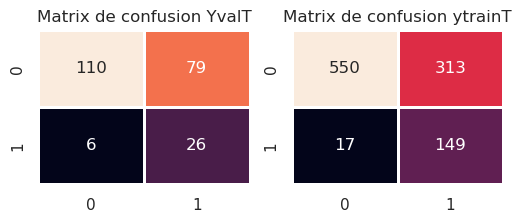

In [1388]:
cf_matrix_vyalT = confusion_matrix(yvalT, predictionsXvalT_weight)
cf_matrix_ytrainT = confusion_matrix(ytrainT, predictionsXtrainT_weight)
plt.figure(figsize=(6, 2))
plt.subplot(1,2,1)
plt.subplot(1,2,1)
plt.title('Matrix de confusion YvalT')
target_names = ['class 0, NO', 'class 1, YES']
print(classification_report(yvalT, predictionsXvalT_weight, target_names=target_names))
sns.heatmap(cf_matrix_vyalT, linewidths=1, annot=True, fmt='g', cbar=False,)
plt.subplot(1,2,2)
plt.title('Matrix de confusion ytrainT')
target_names = ['class 0, NO', 'class 1, YES']
print(classification_report(ytrainT, predictionsXtrainT_weight, target_names=target_names))
sns.heatmap(cf_matrix_ytrainT, linewidths=1, annot=True, fmt='g', cbar=False,)

plt.show

* C) Comparando con los resultados anteriores, se le dio más pesos a las clases positivas, incrementó el acierto en los VP, esto nos interesa. Lo malo de este entrenamiento fue que en las clases negativas quedó sobre entrenado. La matriz de confusión muestra as verdaderos positivos. Se inclinó el acierto hacia las clases positivas. Aunque esto pueda sesgar el acierto hacia las clases positivas, es preferible para mí encontrar más verdaderos positivos.

### 14)

In [1389]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(XtrainT, ytrainT)

In [1390]:
logisticRegr_smote = LogisticRegression()
logisticRegr_smote.fit(X_resampled, y_resampled)

LogisticRegression()

In [1391]:
XtrainT_smote = logisticRegr_smote.predict(XtrainT)

In [1392]:
score = accuracy_score(ytrainT, XtrainT_smote)
score

0.8017492711370262

In [1393]:
recall_score(ytrainT, XtrainT_smote, average='macro')

0.8039620823967946

In [1394]:
XvalT_smote = logisticRegr_smote.predict(XvalT)
XvalT_smote

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1])

In [1395]:
score = accuracy_score(yvalT, XvalT_smote)
score

0.7737556561085973

In [1396]:
recall_score(yvalT, XvalT_smote, average='macro')

0.7768683862433863

              precision    recall  f1-score   support

 class 0, NO       0.95      0.77      0.85       189
class 1, YES       0.37      0.78      0.50        32

    accuracy                           0.77       221
   macro avg       0.66      0.78      0.68       221
weighted avg       0.87      0.77      0.80       221

              precision    recall  f1-score   support

 class 0, NO       0.96      0.80      0.87       863
class 1, YES       0.44      0.81      0.57       166

    accuracy                           0.80      1029
   macro avg       0.70      0.80      0.72      1029
weighted avg       0.87      0.80      0.82      1029



<function matplotlib.pyplot.show(close=None, block=None)>

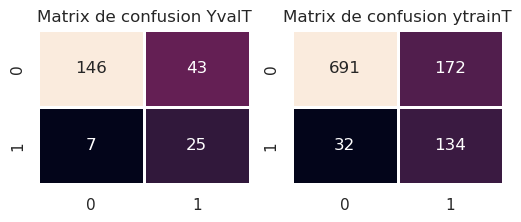

In [1397]:
cf_matrix_vyalT = confusion_matrix(yvalT, XvalT_smote)
cf_matrix_ytrainT = confusion_matrix(ytrainT, XtrainT_smote)
plt.figure(figsize=(6, 2))
plt.subplot(1,2,1)
plt.subplot(1,2,1)
plt.title('Matrix de confusion YvalT')
target_names = ['class 0, NO', 'class 1, YES']
print(classification_report(yvalT, XvalT_smote, target_names=target_names))
sns.heatmap(cf_matrix_vyalT, linewidths=1, annot=True, fmt='g', cbar=False,)
plt.subplot(1,2,2)
plt.title('Matrix de confusion ytrainT')
target_names = ['class 0, NO', 'class 1, YES']
print(classification_report(ytrainT, XtrainT_smote, target_names=target_names))
sns.heatmap(cf_matrix_ytrainT, linewidths=1, annot=True, fmt='g', cbar=False,)

plt.show

* C) De todos los modelos hasta este punto, este es el que ha tenido más balance en la predicción de las clases positivas, en general en todas, pero el balance es más evidente. Los verdaderos positivos incrementaron lo que es el interés.

### 15) 

In [1398]:
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(XtrainT, ytrainT)

In [1399]:
logisticRegr_smote_enn = LogisticRegression()
logisticRegr_smote_enn.fit(X_resampled, y_resampled)

LogisticRegression()

In [1400]:
XtrainT_smote_enn = logisticRegr_smote_enn.predict(XtrainT)

In [1401]:
score = accuracy_score(ytrainT, XtrainT_smote_enn)
score

0.6724975704567542

In [1402]:
recall_score(ytrainT, XtrainT_smote, average='macro')

0.8039620823967946

In [1403]:
XvalT_smote_enn = logisticRegr_smote_enn.predict(XvalT)
XvalT_smote_enn

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1])

In [1404]:
score = accuracy_score(yvalT, XvalT_smote_enn)
score

0.5927601809954751

In [1405]:
recall_score(yvalT, XvalT_smote_enn, average='macro')

0.6970072751322751

In [1406]:
smote_omek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_omek.fit_resample(XtrainT, ytrainT)

In [1407]:
logisticRegr_omek = LogisticRegression()
logisticRegr_omek.fit(X_resampled, y_resampled)

LogisticRegression()

In [1408]:
XtrainT_smote_omek = logisticRegr_omek.predict(XtrainT)
XtrainT_smote_omek

array([0, 0, 0, ..., 0, 1, 0])

In [1409]:
score = accuracy_score(ytrainT, XtrainT_smote_omek)
score

0.7998056365403304

In [1410]:
recall_score(ytrainT, XtrainT_smote_omek, average='macro')

0.8003706599282414

In [1411]:
XvalT_smote_omek = logisticRegr_omek.predict(XvalT)
XvalT_smote_omek

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1])

In [1412]:
score = accuracy_score(yvalT, XvalT_smote_omek)
score

0.7737556561085973

              precision    recall  f1-score   support

 class 0, NO       0.95      0.77      0.85       189
class 1, YES       0.37      0.78      0.50        32

    accuracy                           0.77       221
   macro avg       0.66      0.78      0.68       221
weighted avg       0.87      0.77      0.80       221

              precision    recall  f1-score   support

 class 0, NO       0.95      0.80      0.87       863
class 1, YES       0.43      0.80      0.56       166

    accuracy                           0.80      1029
   macro avg       0.69      0.80      0.72      1029
weighted avg       0.87      0.80      0.82      1029



<function matplotlib.pyplot.show(close=None, block=None)>

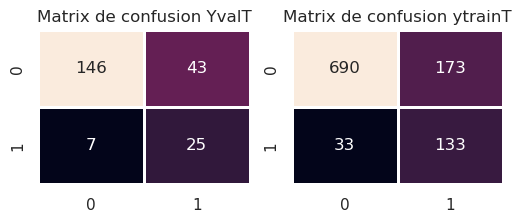

In [1413]:
cf_matrix_vyalT = confusion_matrix(yvalT, XvalT_smote_omek)
cf_matrix_ytrainT = confusion_matrix(ytrainT, XtrainT_smote_omek)
plt.figure(figsize=(6, 2))
plt.subplot(1,2,1)
plt.subplot(1,2,1)
plt.title('Matrix de confusion YvalT')
target_names = ['class 0, NO', 'class 1, YES']
print(classification_report(yvalT, XvalT_smote_omek, target_names=target_names))
sns.heatmap(cf_matrix_vyalT, linewidths=1, annot=True, fmt='g', cbar=False,)
plt.subplot(1,2,2)
plt.title('Matrix de confusion ytrainT')
target_names = ['class 0, NO', 'class 1, YES']
print(classification_report(ytrainT, XtrainT_smote_omek, target_names=target_names))
sns.heatmap(cf_matrix_ytrainT, linewidths=1, annot=True, fmt='g', cbar=False,)

plt.show

* 15) entre SMOTE y SMOTETomek no hay mucha diferencia. Diminuye un caso de falsos negativos. 

### PARTE 5: La importancia de los factores

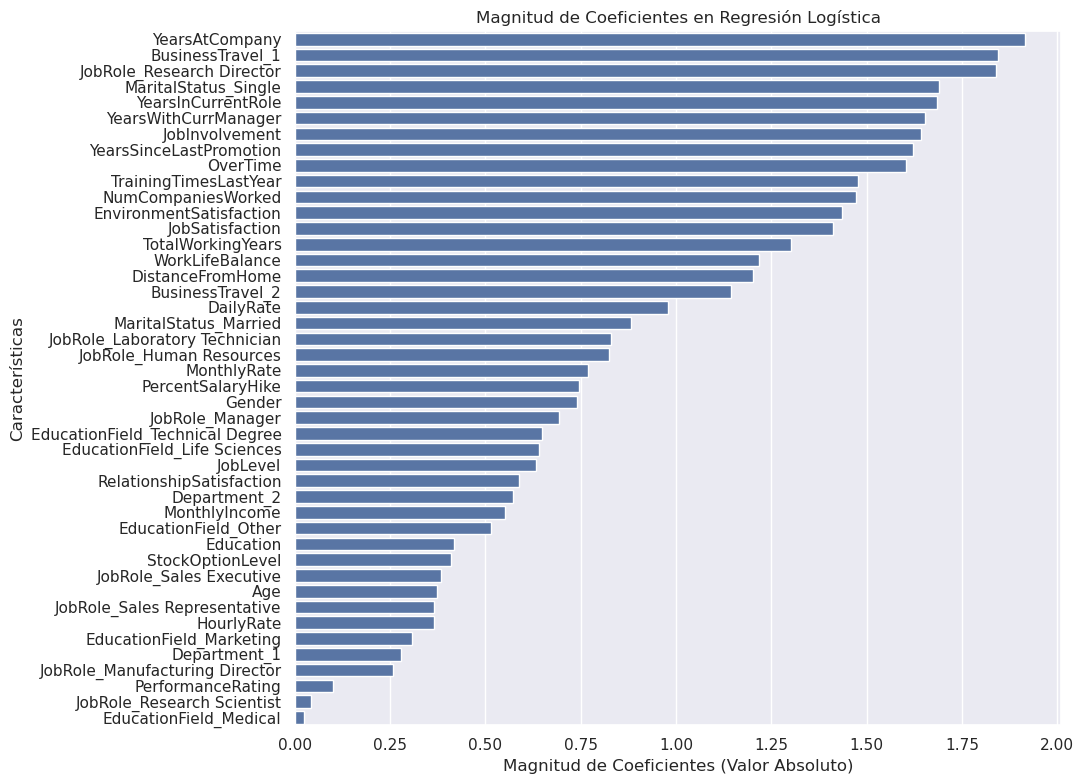

In [1414]:
coeficients = logisticRegr_smote.coef_[0]

# Crear un DataFrame para almacenar los coeficientes junto con el nombre de las características
features = XtrainT.columns  # Supongamos que X_train es un DataFrame de pandas
coeficients_df = pd.DataFrame({'Feature': features, 'Coefficient': coeficients})

# Calcular la magnitud de los coeficientes (valor absoluto)
coeficients_df['Magnitude'] = coeficients_df['Coefficient'].abs()

# Ordenar el DataFrame por magnitud de coeficientes de mayor a menor
coeficients_df = coeficients_df.sort_values(by='Magnitude', ascending=False)

plt.figure(figsize=(11, 8))
sns.barplot(x='Magnitude', y='Feature', data=coeficients_df)

# Agregar título y etiquetas de ejes
plt.title('Magnitud de Coeficientes en Regresión Logística')
plt.xlabel('Magnitud de Coeficientes (Valor Absoluto)')
plt.ylabel('Características')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

* B) Considero que los factores que más influyen en la attrition de un empleado son:
    * Overtime
    * EnviromentalSatisfaction 
    * JobRole (entre más alto el rango de attrition se puede observar).

* C) Considero que los factores que influyen en el que no se sufra de attrition.
    * RelationShipSatisfaction
    * HourlyRate
    * MonthyRAte 

### 17) 

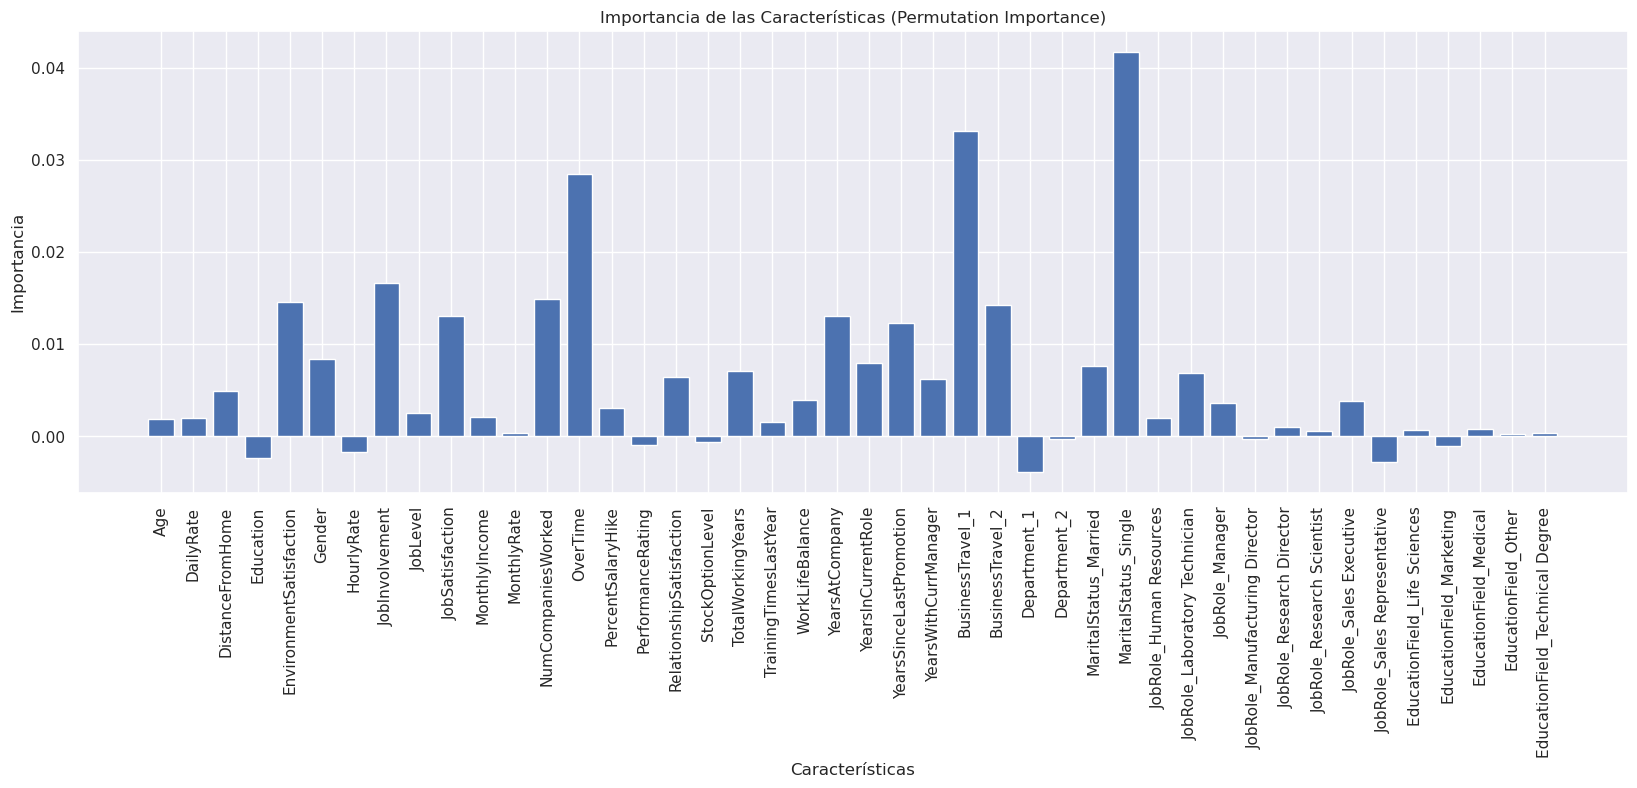

In [1415]:
# Calcular la importancia de la permutación
result = permutation_importance(logisticRegr_smote, XtrainT, ytrainT, n_repeats=10, random_state=42)

# Obtener los puntajes de importancia de las características
importance = result.importances_mean

# Obtener los nombres de las características
feature_names = XtrainT.columns
# Crear un gráfico de barras para mostrar la importancia de las características
plt.figure(figsize=(20, 6))
plt.bar(feature_names, importance)
plt.title('Importancia de las Características (Permutation Importance)')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.xticks(rotation=90)
plt.show()

F1 weighted scores: [0.83066387 0.83040308 0.87582017 0.85717368 0.88220294]
Mean F1 weighted score: 0.8552527488351442


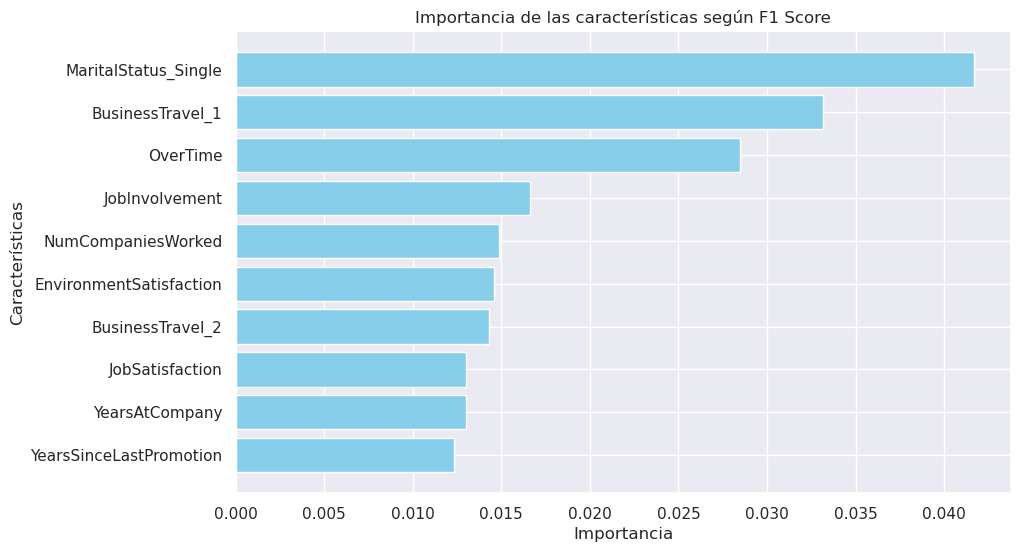

In [1416]:
# Crear el scorer para la métrica f1_weighted
scorer = make_scorer(f1_score, average='weighted')

# Utilizar cross_val_score con scoring='f1_weighted' para evaluar el modelo
cv_scores = cross_val_score(logisticRegr_smote, XtrainT, ytrainT, cv=5, scoring=scorer)

# Imprimir los resultados de la validación cruzada
print("F1 weighted scores:", cv_scores)
print("Mean F1 weighted score:", cv_scores.mean())

# Obtener los nombres de las características
feature_names = XtrainT.columns

result = permutation_importance(logisticRegr_smote, XtrainT, ytrainT, n_repeats=10, random_state=42)
importance = result.importances_mean
# Ordenar las características por importancia
sorted_indices = np.argsort(importance)
sorted_importance = importance[sorted_indices]
sorted_features = feature_names[sorted_indices]

# Crear un gráfico de barras para mostrar las características más importantes
plt.figure(figsize=(10, 6))
plt.barh(sorted_features[-10:], sorted_importance[-10:], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las características según F1 Score')
plt.show()

F1 weighted scores: [0.78995301 0.79531406 0.80949742 0.80544037 0.78806225]
Mean F1 weighted score: 0.7976534217679616


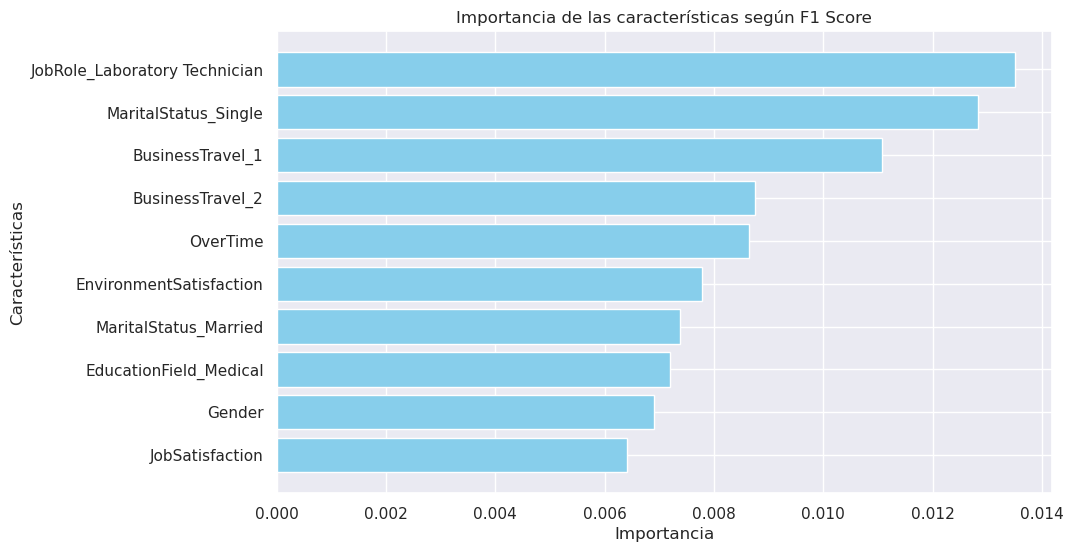

In [1417]:
# Crear el scorer para la métrica f1_weighted
scorer = make_scorer(f1_score, average='weighted')

# Utilizar cross_val_score con scoring='f1_weighted' para evaluar el modelo
cv_scores = cross_val_score(kNN2, XtrainT, ytrainT, cv=5, scoring=scorer)

# Imprimir los resultados de la validación cruzada
print("F1 weighted scores:", cv_scores)
print("Mean F1 weighted score:", cv_scores.mean())

# Obtener los nombres de las características
feature_names = XtrainT.columns

result = permutation_importance(kNN2, XtrainT, ytrainT, n_repeats=10, random_state=42)
importance = result.importances_mean
# Ordenar las características por importancia
sorted_indices = np.argsort(importance)
sorted_importance = importance[sorted_indices]
sorted_features = feature_names[sorted_indices]

# Crear un gráfico de barras para mostrar las características más importantes
plt.figure(figsize=(10, 6))
plt.barh(sorted_features[-10:], sorted_importance[-10:], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las características según F1 Score')
plt.show()

* B) ¿Cuáles factores consideras que son los que influyen mayormente a que un
empleado abandone su trabajo (attrition)?

    * OverTime
    * JobSatisfaction

* C)  ¿Cuáles factores consideras que son los que influyen mayormente a que un
empleado no abandone su trabajo (not attrition)?
    * JobSatisFaction
    * JobRole

* D) Considero que el que me dio mejores resultados segun los factores que considero criticos para el attrition fue el logisticRegr_smote.

### 18) 

In [1418]:
sfm = SelectFromModel(logisticRegr_smote, threshold='median')  # Seleccionar características cuya importancia esté por encima de la mediana
X_selected = sfm.fit_transform(XtrainT, ytrainT)
percent = (X_selected.shape[1]/44)*100
# Imprimir las características seleccionadas
print("Número de características originales:", XtrainT.shape[1])
print("Número de características seleccionadas:", X_selected.shape[1])
print(f"Porcentaje de características seleccionadas: {percent} %")

Número de características originales: 44
Número de características seleccionadas: 22
Porcentaje de características seleccionadas: 50.0 %


In [1419]:
X_train_selected = sfm.fit_transform(XtrainT, ytrainT)
X_test_selected = sfm.transform(XtrainT)
X_val_selected = sfm.transform(XtrainT)
logisticRegr_smote.fit(X_train_selected, ytrainT)

X_val_tr_selected = sfm.fit_transform(XvalT, yvalT)
X_val_tst_selected = sfm.transform(XvalT)
X_val_selected = sfm.transform(XvalT)
logisticRegr_smote.fit(X_val_tr_selected, yvalT)

LogisticRegression()

In [1420]:
predictionsXtrainT_selected = logisticRegr_smote.predict(X_test_selected)
predictionsXtrainT_selected

array([0, 0, 0, ..., 0, 0, 0])

In [1421]:
score = accuracy_score(ytrainT, predictionsXtrainT_selected)
score

0.8415937803692906

In [1422]:
recall_score(ytrainT, predictionsXtrainT_selected, average='macro')

0.5333628837482025

In [1423]:
predictionsXvalT_selected = logisticRegr_smote.predict(X_val_tst_selected)
predictionsXvalT_selected

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [1424]:
score = accuracy_score(yvalT, predictionsXvalT_selected)
score

0.9230769230769231

In [1425]:
recall_score(yvalT, predictionsXvalT_selected, average='macro')

0.734375

              precision    recall  f1-score   support

 class 0, NO       0.92      1.00      0.96       189
class 1, YES       1.00      0.47      0.64        32

    accuracy                           0.92       221
   macro avg       0.96      0.73      0.80       221
weighted avg       0.93      0.92      0.91       221

              precision    recall  f1-score   support

 class 0, NO       0.95      0.80      0.87       863
class 1, YES       0.43      0.80      0.56       166

    accuracy                           0.80      1029
   macro avg       0.69      0.80      0.72      1029
weighted avg       0.87      0.80      0.82      1029



<function matplotlib.pyplot.show(close=None, block=None)>

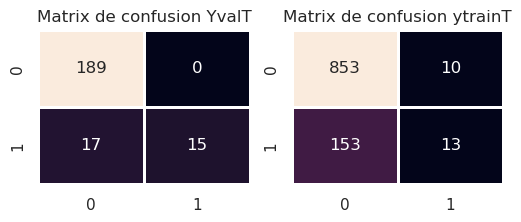

In [1426]:
cf_matrix_vyalT = confusion_matrix(yvalT, predictionsXvalT_selected)
cf_matrix_ytrainT = confusion_matrix(ytrainT, predictionsXtrainT_selected)
plt.figure(figsize=(6, 2))
plt.subplot(1,2,1)
plt.subplot(1,2,1)
plt.title('Matrix de confusion YvalT')
target_names = ['class 0, NO', 'class 1, YES']
print(classification_report(yvalT, predictionsXvalT_selected, target_names=target_names))
sns.heatmap(cf_matrix_vyalT, linewidths=1, annot=True, fmt='g', cbar=False,)
plt.subplot(1,2,2)
plt.title('Matrix de confusion ytrainT')
target_names = ['class 0, NO', 'class 1, YES']
print(classification_report(ytrainT, XtrainT_smote_omek, target_names=target_names))
sns.heatmap(cf_matrix_ytrainT, linewidths=1, annot=True, fmt='g', cbar=False,)

plt.show

# 19) 

In [1433]:


X_train_selected = sfm.fit_transform(XtestT, ytestT)
X_test_selected = sfm.transform(XtestT)
X_val_selected = sfm.transform(XtestT)
logisticRegr_smote.fit(X_train_selected, ytestT)

X_val_tr_selected = sfm.fit_transform(XvalT, yvalT)
X_val_tst_selected = sfm.transform(XvalT)
X_val_selected = sfm.transform(XvalT)
logisticRegr_smote.fit(X_val_tr_selected, yvalT)

lrg_smote = SMOTE(random_state=42)
X_resampled, y_resampled = lrg_smote.fit_resample(X_test_selected, ytest)

logisticRegr_smote = LogisticRegression()
logisticRegr_smote.fit(X_resampled, y_resampled)

LogisticRegression()

In [1440]:
predictionsXtrainT_selected = logisticRegr_smote.predict(X_test_selected)
predictionsXtrainT_selected
le.fit(predictionsXtrainT_selected)
predictionsXtrainT_selected = le.transform(predictionsXtrainT_selected)

In [1441]:
score = accuracy_score(ytestT, predictionsXtrainT_selected)
score

0.85

In [1443]:
recall_score(ytestT, predictionsXtrainT_selected, average='macro')

0.8183170420739482

              precision    recall  f1-score   support

 class 0, NO       0.95      0.87      0.90       181
class 1, YES       0.56      0.77      0.65        39

    accuracy                           0.85       220
   macro avg       0.75      0.82      0.78       220
weighted avg       0.88      0.85      0.86       220



<function matplotlib.pyplot.show(close=None, block=None)>

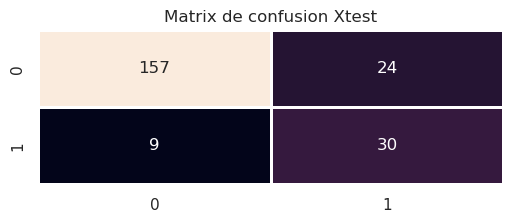

In [1446]:
cf_matrix_ytrainT = confusion_matrix(ytestT, predictionsXtrainT_selected)
plt.figure(figsize=(6, 2))

plt.title('Matrix de confusion XtestT')
target_names = ['class 0, NO', 'class 1, YES']
print(classification_report(ytestT, predictionsXtrainT_selected, target_names=target_names))
sns.heatmap(cf_matrix_ytrainT, linewidths=1, annot=True, fmt='g', cbar=False,)

plt.show

* El mejor modelo me lo dio el conjunto de SMOTE con LogisticRegression. Este conjunto me dio un recall más alto que los demás modelos. También me ayudo a balancear en la matrix de confusión los verdaderos positivos y los falsos positivos. Lo que me indica que el modelo está mas balanceado entre las clases negativas y positivas. Recall para mí era el número a aumentar, también hubo una disminución del parámetro presicion en este último modelo, lo que me dice que el modelo no está sobre entrenado y está más balanceado. 
* Con un Recall de 0.77 con la validación del set XtestT obtuve el racall más alto entre todos los modelos, por lo que nuestro modelo deberia de ser más preciso para encontrar posibles Attririon en trabajadores en este contexto. Tenemos más confianza en pronosticar un Attrition antes que suceda.
* El F1-score con 0.85 podemos decir que el rendimiento de nuestro modelo es bueno. Nos indica un balance entre precision  y recall lo que es lo óptimo para detectar cualquiera de las 2 clases. Es importante F1-Score, ya que teníamos un desequilibrio de clases. 